
# data_TIMELInE
### ไวร์เลสเร้าเตอร์ | ONU fiber 4 lan |                                            


In [3]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 31
time_a = pd.date_range('2016-10-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-10-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

####### set databases to empty #########
query_empty = """truncate table data_timeline.wireless_router""" 
c.execute(query_empty)
print "data_timeline.wireless_router are Empty!!! \n"

query = "SELECT watt FROM collected_info.14_wireless_router WHERE no >= '%s'   AND no <= '%s'; "% (0,1281)
df = pd.read_sql(query, conn)

i = 0
j = 0

while (j <= (5760*d)-1): 
    c.execute("INSERT INTO data_timeline.wireless_router (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
    conn.commit()
    i+=1
    j+=1

    if (i >= len(df)):
        i = 0    
        print ".",
print '\nDONE!'        


data_timeline.wireless_router are Empty!!! 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
DONE!


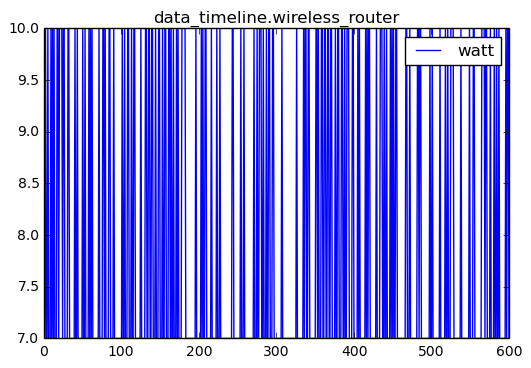

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  


# query = "SELECT watt FROM device.refrigurator WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT watt FROM data_timeline.wireless_router WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[600])
df = pd.read_sql(query, conn)

fig, ax = plt.subplots()
ax.set_title('data_timeline.wireless_router')
df.plot(ax=ax )
plt.show()
